Dataset loaded: 150 samples, 5 attributes


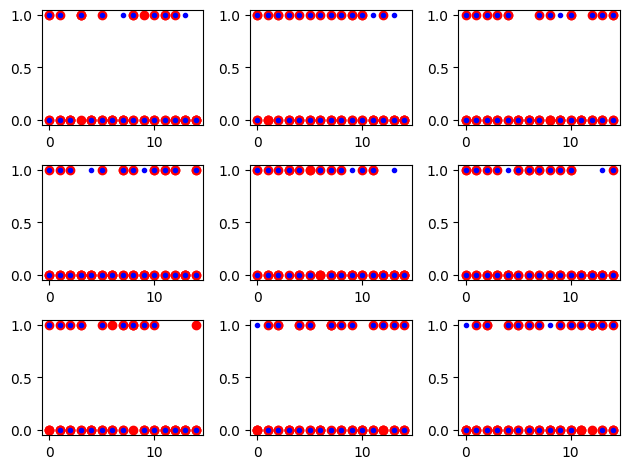

Mean accuracy: 0.9204092204092205
Mean precision: 1.0
Mean recall: 0.6296296296296297
Mean fmeasure: 0.7407407407407408
Mean sensitivity: 0.6296296296296297
Mean specificity: 1.0

SVM Configuration:
Kernel: rbf
Gamma: 0.01
C: 1000


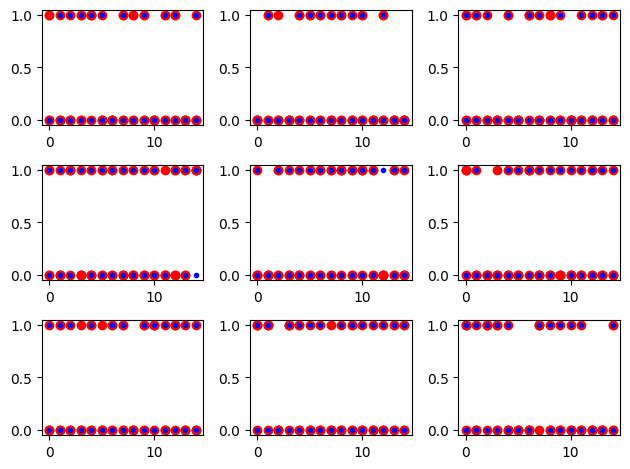

Mean accuracy: 0.922047397047397
Mean precision: 1.0
Mean recall: 0.6296296296296295
Mean fmeasure: 0.7407407407407407
Mean sensitivity: 0.6296296296296295
Mean specificity: 1.0

SVM Configuration:
Kernel: rbf
Gamma: 0.03
C: 1000


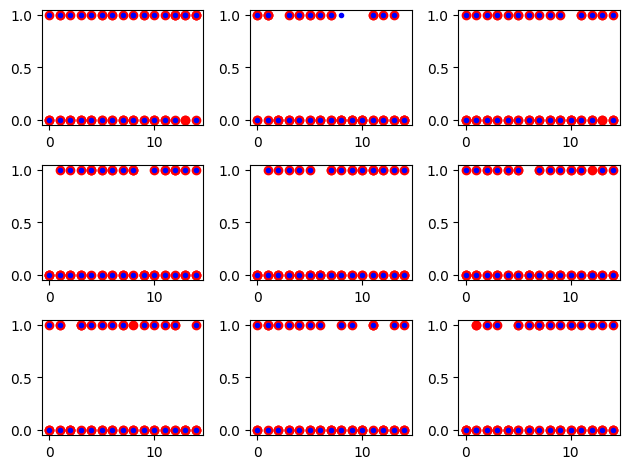

Mean accuracy: 0.9695286195286195
Mean precision: 1.0
Mean recall: 0.8333333333333334
Mean fmeasure: 0.8888888888888888
Mean sensitivity: 0.8333333333333334
Mean specificity: 1.0

SVM Configuration:
Kernel: rbf
Gamma: 0.1
C: 1000


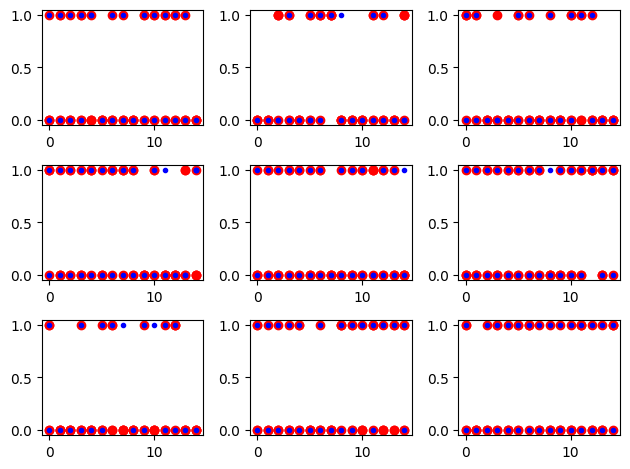

Mean accuracy: 0.8986013986013985
Mean precision: 1.0
Mean recall: 0.5370370370370371
Mean fmeasure: 0.6666666666666666
Mean sensitivity: 0.5370370370370371
Mean specificity: 1.0

SVM Configuration:
Kernel: rbf
Gamma: 0.3
C: 1000


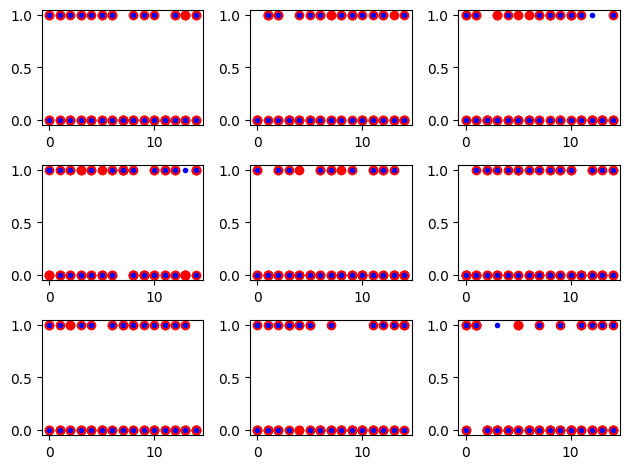

Mean accuracy: 0.9147241647241648
Mean precision: 1.0
Mean recall: 0.6666666666666666
Mean fmeasure: 0.7555555555555555
Mean sensitivity: 0.6666666666666666
Mean specificity: 1.0

SVM Configuration:
Kernel: rbf
Gamma: 1
C: 1000


In [ ]:
# Machine Learning - SVM Classifier with RBF Kernel
# @Author: Dimitris Pontikakis

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

def evaluate(t, predict, criterion):
    """
    Calculate performance metrics for binary classification
    
    Parameters:
    t: actual targets (0/1)
    predict: predicted targets (0/1) 
    criterion: which metric to calculate
    
    Returns:
    value: the calculated metric value
    """
    true_negative = float(0)
    false_negative = float(0)
    true_positive = float(0)
    false_positive = float(0)
    
    for i in range(len(t)):
        if predict[i] == 0:
            if t[i] == 0:
                true_negative += 1
            else:
                false_negative += 1
        else:
            if t[i] == 0:
                false_negative += 1
            else:
                true_positive =+ 1
                
    if criterion == 'accuracy':
        if true_positive + true_negative + false_positive + false_negative == 0:
            return 0
        return (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
    elif criterion == 'precision':
        if true_positive + false_positive == 0:
            return 0
        return true_positive / (true_positive + false_positive)
    elif criterion == 'recall':
        if true_positive + false_negative == 0:
            return 0
        return true_positive / (true_positive + false_negative)
    elif criterion == 'fmeasure':
        precision = evaluate(t, predict, 'precision')
        recall = evaluate(t, predict, 'recall')
        if precision + recall == 0:
            return 0
        return (precision * recall) / ((precision + recall) / 2)
    elif criterion == 'sensitivity':
        if true_positive + false_negative == 0:
            return 0
        return true_positive / (true_positive + false_negative)
    elif criterion == 'specificity':
        if true_negative + false_positive == 0:
            return 0
        return true_negative / (true_negative + false_positive)
    
# Load and prepare the dataset
data = read_csv('iris.data', header=None).values

number_of_patterns, number_of_attributes = data.shape
print(f"Dataset loaded: {number_of_patterns} samples, {number_of_attributes} attributes")

# One vs Rest multiclass classification
map_dict = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 0}

# Prepare features (x) and targets (t)
x = data[:, 0:4].astype(float)  # First 4 columns are features
labels = data[:, 4]  # Last column has class names

t = np.zeros(number_of_patterns, dtype=int)
for pattern in range(number_of_patterns):
    t[pattern] = map_dict[labels[pattern]]
    
# Compute all predictions with one matrix multiplication
x = np.hstack((x, np.ones([number_of_patterns, 1]))) # Add a column of 1s to handle the bias term (4 features + 1 bias term)
x = x.astype(float)

# # Get user input for training parameters
# gamma  = float(input("Enter gamma parameter: "))
# c  = float(input("Enter C parameter: "))

# Test different parameter combinations
for gamma in [0.01, 0.03, 0.1, 0.3, 1]:
    for c in [1, 10, 100, 1000]:
        mean_accuracy = 0.0
        mean_precision = 0.0
        mean_recall = 0.0
        mean_fmeasure = 0.0
        mean_sensitivity = 0.0
        mean_specificity = 0.0

        # Cross-validation with 9 folds
        for fold in range(9):
            xtrain, xtest, ttrain, ttest = train_test_split(x, t, test_size=0.1)
            
            # Create SVM classifier with RBF kernel: k(x, y) = exp(-gamma * ||x - y||²)
            svm = SVC(
                C=c,                    # Regularization parameter
                kernel='rbf',           # Radial Basis Function kernel
                gamma=gamma,            # Kernel coefficient
                random_state=fold       # For reproducibility
            )
            
            # Train the SVM
            svm.fit(xtrain, ttrain)
            
            # Make predictions
            predict = svm.predict(xtest)

            mean_accuracy += evaluate(ttest, predict, 'accuracy')
            mean_precision += evaluate(ttest, predict, 'precision')
            mean_recall += evaluate(ttest, predict, 'recall')
            mean_fmeasure += evaluate(ttest, predict, 'fmeasure')
            mean_sensitivity += evaluate(ttest, predict, 'sensitivity')
            mean_specificity += evaluate(ttest, predict, 'specificity')

            plt.subplot(3, 3, fold + 1)
            plt.plot(predict, "ro")
            plt.plot(ttest, "b.")

    plt.tight_layout()
    plt.show()

    print('Mean accuracy: {}'.format(mean_accuracy / 9))
    print('Mean precision: {}'.format(mean_precision / 9))
    print('Mean recall: {}'.format(mean_recall / 9))
    print('Mean fmeasure: {}'.format(mean_fmeasure / 9))
    print('Mean sensitivity: {}'.format(mean_sensitivity / 9))
    print('Mean specificity: {}'.format(mean_specificity / 9))

    # Print SVM configuration
    print('\nSVM Configuration:')
    print('Kernel: rbf')
    print('Gamma: {}'.format(gamma))
    print('C: {}'.format(c))